In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir('C:/Users/Jack Wills/Documents/Portfolio/Projects/MCMC - Enigma Thanos')

In [2]:
text = open('marvel_data.txt', encoding="utf8").read().lower()

In [3]:
len(text)

28213380

In [4]:
known_chars = 'abcdefghijklmnopqrstuvwxyz0123456789 ,.?!:;'

In [5]:
def create_empty_dict(known_chars):
    empty_dict = {}
    for i in known_chars:
        for j in known_chars:
            empty_dict.setdefault(i, {})[j] = 0    
    return empty_dict

def create_count_dict(text, known_chars):
    count_dict = create_empty_dict(known_chars)
    for i in range(len(text) - 1):
        char_a = text[i]
        char_b = text[i+1]
        if char_a in known_chars and char_b in known_chars:
            count_dict[char_a][char_b] += 1
    return count_dict

def create_perc_dict(count_dict, known_chars):
    perc_dict = create_empty_dict(known_chars)
    for i in known_chars:
        total_count = sum(count_dict[i].values())
        for j in known_chars:
            letter_perc = (count_dict[i][j] + 1) / total_count
            perc_dict[i][j] = np.log(letter_perc)
    return perc_dict

In [6]:
count_dict = create_count_dict(text, known_chars)
perc_dict = create_perc_dict(count_dict, known_chars)

In [174]:
count_dict

{'a': {'a': 1454,
  'b': 39363,
  'c': 89594,
  'd': 76129,
  'e': 2336,
  'f': 26663,
  'g': 49485,
  'h': 3873,
  'i': 61309,
  'j': 1354,
  'k': 27137,
  'l': 161602,
  'm': 71395,
  'n': 403327,
  'o': 1198,
  'p': 50067,
  'q': 417,
  'r': 182546,
  's': 206772,
  't': 239287,
  'u': 23299,
  'v': 38347,
  'w': 16054,
  'x': 4061,
  'y': 22870,
  'z': 6066,
  '0': 0,
  '1': 1,
  '2': 1,
  '3': 0,
  '4': 0,
  '5': 0,
  '6': 0,
  '7': 0,
  '8': 0,
  '9': 0,
  ' ': 147267,
  ',': 7523,
  '.': 8117,
  '?': 0,
  '!': 6,
  ':': 165,
  ';': 103},
 'b': {'a': 41943,
  'b': 4195,
  'c': 372,
  'd': 1210,
  'e': 92571,
  'f': 12,
  'g': 283,
  'h': 105,
  'i': 23269,
  'j': 1381,
  'k': 10,
  'l': 41071,
  'm': 429,
  'n': 141,
  'o': 41469,
  'p': 8,
  'q': 0,
  'r': 27247,
  's': 6033,
  't': 1243,
  'u': 34603,
  'v': 172,
  'w': 200,
  'x': 0,
  'y': 49666,
  'z': 6,
  '0': 0,
  '1': 14,
  '2': 0,
  '3': 0,
  '4': 0,
  '5': 0,
  '6': 0,
  '7': 0,
  '8': 0,
  '9': 0,
  ' ': 5064,
  ',': 

In [7]:
def create_rand_crypt(known_chars):
    list_chars = list(known_chars)
    random.shuffle(list_chars)
    rand_chars = ''.join(list_chars)
    return rand_chars

def str_to_key(known_chars, chars):
    crypt_dict = {}
    for i in range(len(known_chars)):
        crypt_dict[known_chars[i]] = chars[i]
    return crypt_dict

def apply_dict(text, key_dict):
    text_list = list(text)
    for i in range(len(text_list)):
        new_char = key_dict[text_list[i]]
        text_list[i] = new_char
    new_text = ''.join(text_list)
    return new_text

def invert_dict(key_dict):
    inverted_dict = {v: k for k, v in key_dict.items()}
    return inverted_dict  

In [8]:
text = "My children, the time has come to execute my great plan and fulfil my destiny. \
The plan, as you know, is to use the cosmic entities known as the infinity stones to wipe half of the universe out of existence so that the other half may thrive. \
Our greatest challenge has been finding the stones in this vast universe, but now they are within our grasp. \
The space stone, knows also as the Tesseract, resides on Asgard. After Lokis failure on Earth, Thor has taken it and put it in Odins vault. \
The power stone is on Morag. I have ordered Ronan the Accuser to retrieve it for me, in return I shall destroy Xandar. \
The mind stone is on Earth, I put it in the staff I gave to Loki, but now I have heard that it is powering a cyborg known as The Vision. \
The reality stone is on the celestial head known as Knowhere. It is with Taneleer Tivan in his pathetic collection, gifted to him by the Asgardians after the Dark Elves failure in acquiring for themselves. \
The time stone is also on Earth, with a group of sorcerers, currently guarded by their leader, the Ancient One. \
The last stone, the soul stone, has yet to be found, but I have put my favourite daughter, Gamora, on to its trail, and she has not disappointed me yet. \
Once a stone is collected I will be able to harness its power using a gauntlet I have ordered the dwarves on Nidavellir. \
The time for cosmic order is near, and when I collect all the stones I will hold universe in my hands. \
Hugs and kisses,  \
Thanos".lower()

crypt_keys = create_rand_crypt(known_chars)
crypt_dict = str_to_key(known_chars, crypt_keys)
crypt_text = apply_dict(text, crypt_dict)

In [9]:
crypt_text

'huvw !kzcq7nv3 qv3!hqv ,evwrhqv3rvq9qwi3qvhuv2cq,3vmk,7v,7zvbikb!kvhuvzqe3!7ufv3 qvmk,7nv,evuriv57r1nv!ev3rvieqv3 qvwreh!wvq73!3!qev57r17v,ev3 qv!7b!7!3uve3r7qev3rv1!mqv ,kbvrbv3 qvi7!;qceqvri3vrbvq9!e3q7wqverv3 ,3v3 qvr3 qcv ,kbvh,uv3 c!;qfvricv2cq,3qe3vw ,kkq72qv ,evtqq7vb!7z!72v3 qve3r7qev!7v3 !ev;,e3vi7!;qceqnvti3v7r1v3 quv,cqv1!3 !7vricv2c,emfv3 qvem,wqve3r7qnv57r1ev,kerv,ev3 qv3qeeqc,w3nvcqe!zqevr7v,e2,czfv,b3qcvkr5!evb,!kicqvr7vq,c3 nv3 rcv ,ev3,5q7v!3v,7zvmi3v!3v!7vrz!7ev;,ik3fv3 qvmr1qcve3r7qv!evr7vhrc,2fv!v ,;qvrczqcqzvcr7,7v3 qv,wwieqcv3rvcq3c!q;qv!3vbrcvhqnv!7vcq3ic7v!ve ,kkvzqe3cruv9,7z,cfv3 qvh!7zve3r7qv!evr7vq,c3 nv!vmi3v!3v!7v3 qve3,bbv!v2,;qv3rvkr5!nvti3v7r1v!v ,;qv q,czv3 ,3v!3v!evmr1qc!72v,vwutrc2v57r17v,ev3 qv;!e!r7fv3 qvcq,k!3uve3r7qv!evr7v3 qvwqkqe3!,kv q,zv57r17v,ev57r1 qcqfv!3v!ev1!3 v3,7qkqqcv3!;,7v!7v !evm,3 q3!wvwrkkqw3!r7nv2!b3qzv3rv !hvtuv3 qv,e2,cz!,7ev,b3qcv3 qvz,c5vqk;qevb,!kicqv!7v,wxi!c!72vbrcv3 qheqk;qefv3 qv3!hqve3r7qv!ev,kervr7vq,c3 nv1!3 v,v2crimv

In [194]:
def score_likelihood(decrypted_text, perc_dict):
    total_likelihood = 0
    for i in range(len(decrypted_text) - 1):
        pair_likelihood = perc_dict[decrypted_text[i]][decrypted_text[i+1]]
        total_likelihood += pair_likelihood
    return total_likelihood

def shuffle_pair(current_dict):
    a, b = random.sample(current_dict.keys(), 2)
    proposed_dict = current_dict.copy()
    proposed_dict[a], proposed_dict[b] = proposed_dict[b], proposed_dict[a]
    return proposed_dict

def eval_proposal(proposed_score, current_score):
    diff = proposed_score - current_score
    diff = min(1, diff)
    diff = max(-1000, diff)
    ratio = math.exp(diff)
    if ratio >= 1 or ratio > np.random.uniform(0,1):
        return True
    else:
        return False 
    
def decrypt_MCMC(cyphered_text, perc_dict, iters, known_chars, verbose = False):
    best_score = []
    best_text = []
    
    # Step 1 - Create a random decryption key 
    current_key = create_rand_crypt(known_chars)
    current_dict = str_to_key(known_chars, crypt_keys)
    # Step 2 - Decrypt the text
    current_decrypted = apply_dict(cyphered_text, current_dict)
    # Step 3 - Score the (log) likelihood of the decrypted text
    current_score = score_likelihood(current_decrypted, perc_dict)
    
    for i in range(iters):
        # Step 4 - Randomly shuffle two letter pairings
        proposed_dict = shuffle_pair(current_dict)
        # Step 5 - Decrypt the text again with the new key
        proposed_decrypted = apply_dict(cyphered_text, proposed_dict)
        # Step 6 - Recompute the log-likelihood score
        proposed_score = score_likelihood(proposed_decrypted, perc_dict)
        # Step 7 - Evaluate the difference
        # If the likelihood has improved, accept the new key
        # If the likelihood hasn't improved but the value exceeds a randomly drawn value between 0-1, also accept the new key
        # Otherwise, reject the new key
        if eval_proposal(proposed_score, current_score):
            current_dict = proposed_dict
            current_score = proposed_score
            current_decrypted = proposed_decrypted
        # Repeat the above for the given amount of iterations
        
        if i % 500 == 0:
            best_score.append(current_score)
            best_text.append(current_decrypted)
        
        if verbose == True and i % 1000 == 0:
            print("Iteration: " + str(i) + ". Score: " + str(current_score) + '. Message: ' + current_decrypted[0:70])
            
    
            
    return current_dict, best_score, best_text

In [195]:
print("Log-likelihood of 'hello': " + str(score_likelihood('hello', perc_dict)))
print("Log-likelihood of 'z9kk3': " + str(score_likelihood('z9kk3', perc_dict)))


Log-likelihood of 'hello': -8.588655609033886
Log-likelihood of 'z9kk3': -32.581453007255924


In [198]:
iters = 25000
current_dict, best_score, best_text = decrypt_MCMC(crypt_text, perc_dict, iters, known_chars, verbose = True)

Iteration: 0. Score: -11396.467647054938. Message:  i;1vd5awx47;.vx;.d x;vnq;1c x;.c;x:x1!.x; i;8wxn.;h5n4;n4a;t!5td5; i;
Iteration: 1000. Score: -4791.780273862953. Message: fyalpimoc nhasp asif aprtalef asea j lus afyagc rsavmrnarnoabumbimafya
Iteration: 2000. Score: -4487.396861190093. Message: vy mpilkcen, spe sive prt mave sa exemuse vy gcers flrn rnk bulbil vy 
Iteration: 3000. Score: -3891.0715881420906. Message: by gpildren, spe sibe pat gobe so exeguse by hreas clan and mulmil by 
Iteration: 4000. Score: -3722.3903326613736. Message: by mhildren, she sibe hat mobe so exemuse by greas clan and fulfil by 
Iteration: 5000. Score: -3702.7351641083937. Message: my children. she sime hat come so execuse my greas plan and fulfil my 
Iteration: 6000. Score: -3449.4071384112485. Message: my children. the time has come to execute my great plan and fulfil my 
Iteration: 7000. Score: -3450.66827844584. Message: my children, the time has come to execute my great plan and fulfil my 
Iterati

In [13]:
best_text[-1]

'my children, the time has come to execute my great plan and fulfil my destiny. the plan, as you know, is to use the cosmic entities known as the infinity stones to wipe half of the universe out of existence so that the other half may thrive. our greatest challenge has been finding the stones in this vast universe, but now they are within our grasp. the space stone, knows also as the tesseract, resides on asgard. after lokis failure on earth, thor has taken it and put it in odins vault. the power stone is on morag. i have ordered ronan the accuser to retrieve it for me, in return i shall destroy xandar. the mind stone is on earth, i put it in the staff i gave to loki, but now i have heard that it is powering a cyborg known as the vision. the reality stone is on the celestial head known as knowhere. it is with taneleer tivan in his pathetic collection, gifted to him by the asgardians after the dark elves failure in acquiring for themselves. the time stone is also on earth, with a group 

In [14]:
# Repeat the MCMC X times, recording the final log-likelihood for each & the final decryption key
def cross_validation(attempts, cyphered_text, perc_dict, iters, known_chars):
    all_scores = []
    all_samples = []
    for i in range(attempts):
        decrpyt_dict, scores, samples = decrypt_MCMC(cyphered_text, perc_dict, iters, known_chars)
        all_scores.append(scores)
        all_samples.append(samples[-1])
    return all_samples, all_scores

In [93]:
cvs = 100
all_samples, all_scores = cross_validation(cvs, crypt_text, perc_dict, iters, known_chars)

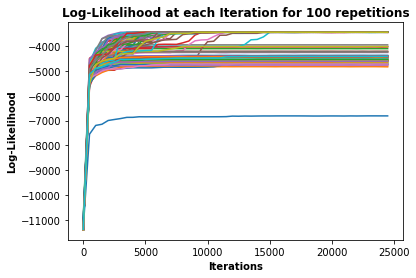

In [96]:
range_iters = list(range(0, iters, 500))
plt.xlabel("Iterations", fontweight = 'bold')
plt.ylabel("Log-Likelihood", fontweight = 'bold')
plt.title("Log-Likelihood at each Iteration for 100 repetitions", fontweight = 'bold')
for i in range(len(all_scores)):
    plt.plot(range_iters, all_scores[i])
plt.show()

In [134]:
def record_first_final(all_scores):
    first_scores = []
    final_scores = []
    final_samples = []
    for i in range(len(all_scores)):
        first_scores.append(all_scores[i][1])
        final_scores.append(all_scores[i][-1])
        final_samples.append(all_samples[i])
    return first_scores, final_scores, final_samples

In [135]:
first_scores, final_scores, final_samples = record_first_final(all_scores)

(0, 100)

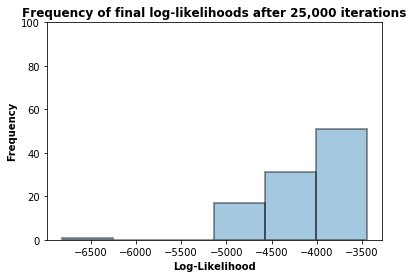

In [200]:
ax = sns.distplot(final_scores, kde = False, bins = 6, hist_kws=dict(edgecolor="k", linewidth=2))
ax.set_xlabel('Log-Likelihood', fontweight = 'bold')
ax.set_ylabel('Frequency', fontweight = 'bold')
ax.set_title('Frequency of final log-likelihoods after 25,000 iterations', fontweight = 'bold')
ax.set_ylim(0, 100)

In [111]:
def print_success(final_scores, global_maxima):
    global_maxima -= 100
    success = sum(i > global_maxima for i in final_scores)
    failures = len(final_scores) - success       
    succ_perc = str(round((success / len(final_scores))*100))
    print("Algorithm coverges successfully: ", str(success), " times")
    print("Algorithm coverges unsuccessfully: ", str(failures), " times")
    print("Algorithm has a " + succ_perc + "% success rate")
    return succ_perc

In [112]:
global_maxima = max(final_scores)
print_success(final_scores, global_maxima)

Algorithm coverges successfully:  50  times
Algorithm coverges unsuccessfully:  50  times
Algorithm has a 50.0% success rate


'50.0'

In [171]:
score_samples = zip(final_scores, final_samples)
sorted_score_samples = sorted(score_samples, key = lambda x: x[0], reverse = True)
example_sample = []
example_score = []
for i in range(int(len(sorted_score_samples)/10)):
    if len(example_score) == 0 or sorted_score_samples[i*10][0] < example_score[-1] - 150:
        example_sample.append(sorted_score_samples[i*10][1][0:100])
        example_score.append(sorted_score_samples[i*10][0])
example_sample.append(sorted_score_samples[-1][1][0:100])
example_score.append(sorted_score_samples[-1][0])

In [172]:
example_sample

['my children. the time has come to execute my great plan and fulfil my destiny, the plan. as you know',
 'by cditgren. lde libe das cobe lo execule by kreal ptan ang futfit by gesliny, lde ptan. as you wnom',
 'by ptlkdore, atr albr tis pnbr an rzrphar by moria wkie ied fhkflk by drsaley. atr wkie, is ynh veng',
 'cheswamdlirke wie aciewonestcie teizisu iecheglio efmoreordepumpamechedin arhbe wiefmorkeonehtue.rty',
 'zi5.46!?327,5942596z254015.8z259852k2. 925zi5:32095t!07507?5; !;6!5zi5?21967if59425t!07,5015i8 5j78q']

In [173]:
example_score

[-3449.4071384112485,
 -3956.3801941965426,
 -4387.621977836902,
 -4566.1860394343785,
 -6813.117781383466]